#### Algorithmic Trading

##### Yahoo finance data

- Data Collection and Processing
- Exploratory Data Analysis
- Hypothesis Formulation
- Strategy Development
- Backtesting the Strategy and Simulation
- Strategy Optimization
- Execution

#### Import Required Libraries

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
#import mplfinance as mpf

# Ensure that our plots are displayed inline within the Jupyter Notebook
%matplotlib inline

#### Data Collection and Processing

In [62]:
# Define the ticker symbols for the assets we're interested in
tickers = ['ZYDUSLIFE.NS'] #['JPM', 'GS', 'MS', 'BLK', 'C']

# Download historical data for these assets until the end of November 2023
start_date = '2024-01-01'
end_date = '2025-04-30'
data = yf.download(tickers,start=start_date, end=end_date)

# Preprocess the data by ensuring there are no missing values
data = data.dropna()

# Display the first few rows of the data
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,ZYDUSLIFE.NS,ZYDUSLIFE.NS,ZYDUSLIFE.NS,ZYDUSLIFE.NS,ZYDUSLIFE.NS
Date,,,,,
2024-01-01,697.410583,705.440543,683.295763,686.388026,2371842
2024-01-02,710.477966,713.221124,697.909339,705.689921,2433838
2024-01-03,708.632568,714.218611,707.186164,710.627592,921911
2024-01-04,707.385681,714.068963,705.241006,710.228566,1116138
2024-01-05,712.472961,713.570200,704.243487,711.226071,1041423


#### Exploratory Data Analysis

In [67]:
import pandas as pd 
import matplotlib.pyplot as plt 
import requests
import math
#from termcolor import colored as cl 
import numpy as np

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

[*********************100%***********************]  1 of 1 completed


                 Close
Date                  
2020-01-01  242.630905
2020-01-02  244.634949
2020-01-03  248.118134
2020-01-06  243.346634
2020-01-07  245.302948


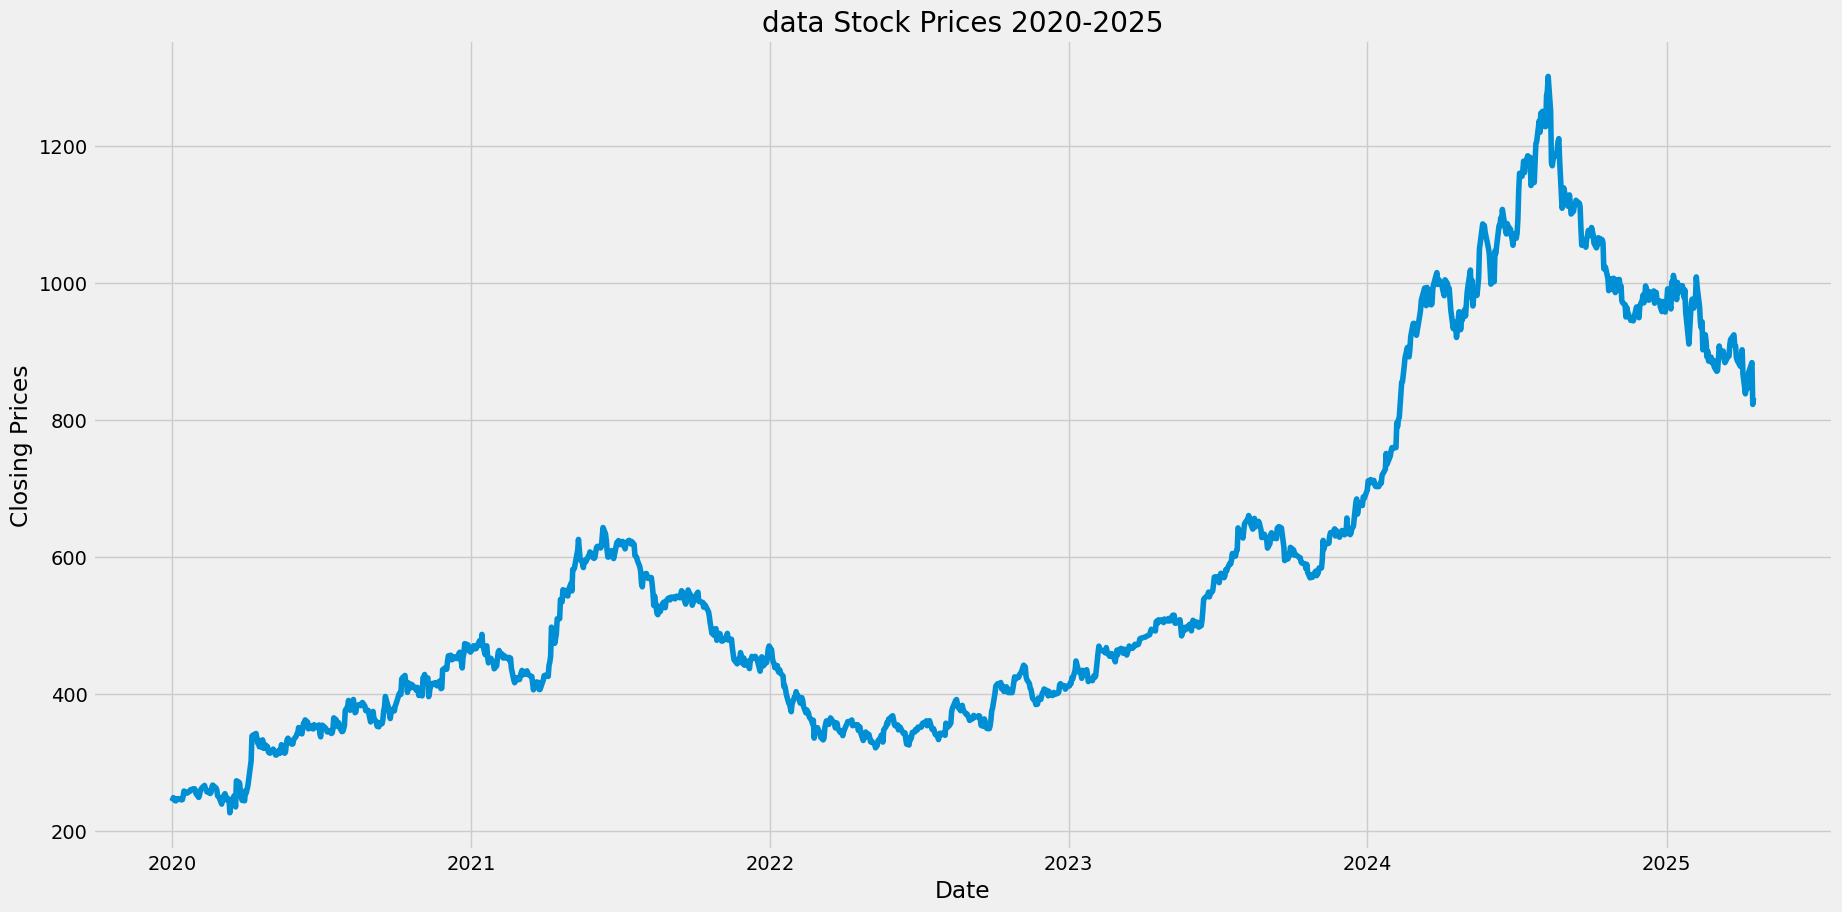

                 Close      sma_20
Date                              
2025-04-15  883.150024  888.025003
2025-04-16  822.099976  884.975003
2025-04-17  831.549988  881.917502


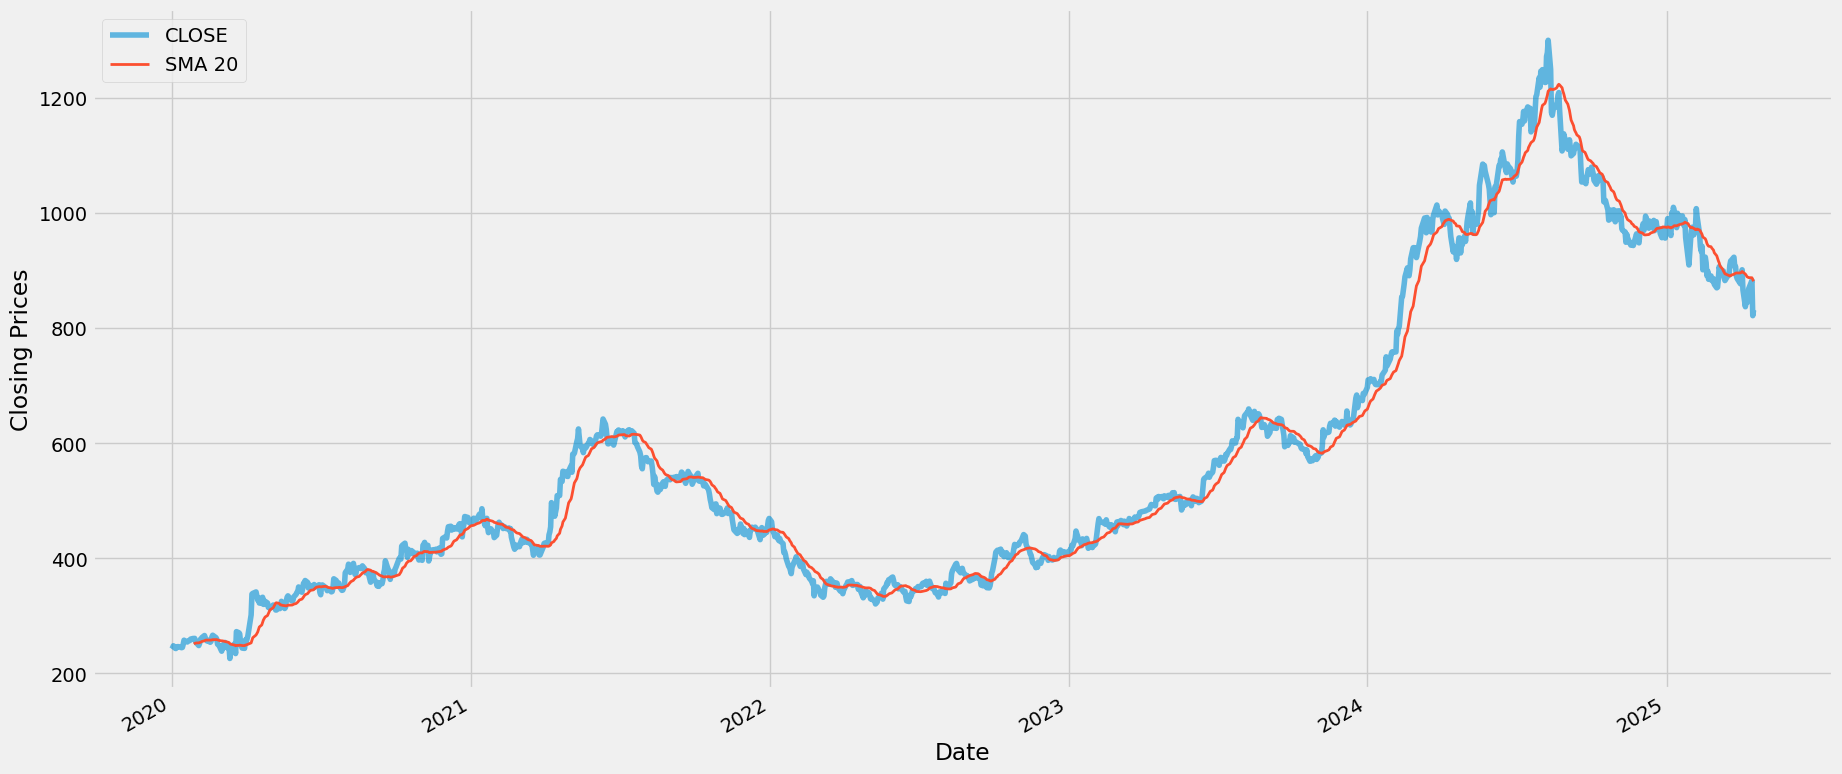

                 Close      sma_20    upper_bb    lower_bb
Date                                                      
2025-04-09  844.400024  889.830002  936.818103  842.841901
2025-04-11  868.849976  888.280002  935.917116  840.642888
2025-04-15  883.150024  888.025003  935.717361  840.332645
2025-04-16  822.099976  884.975003  941.057589  828.892417
2025-04-17  831.549988  881.917502  942.697620  821.137384


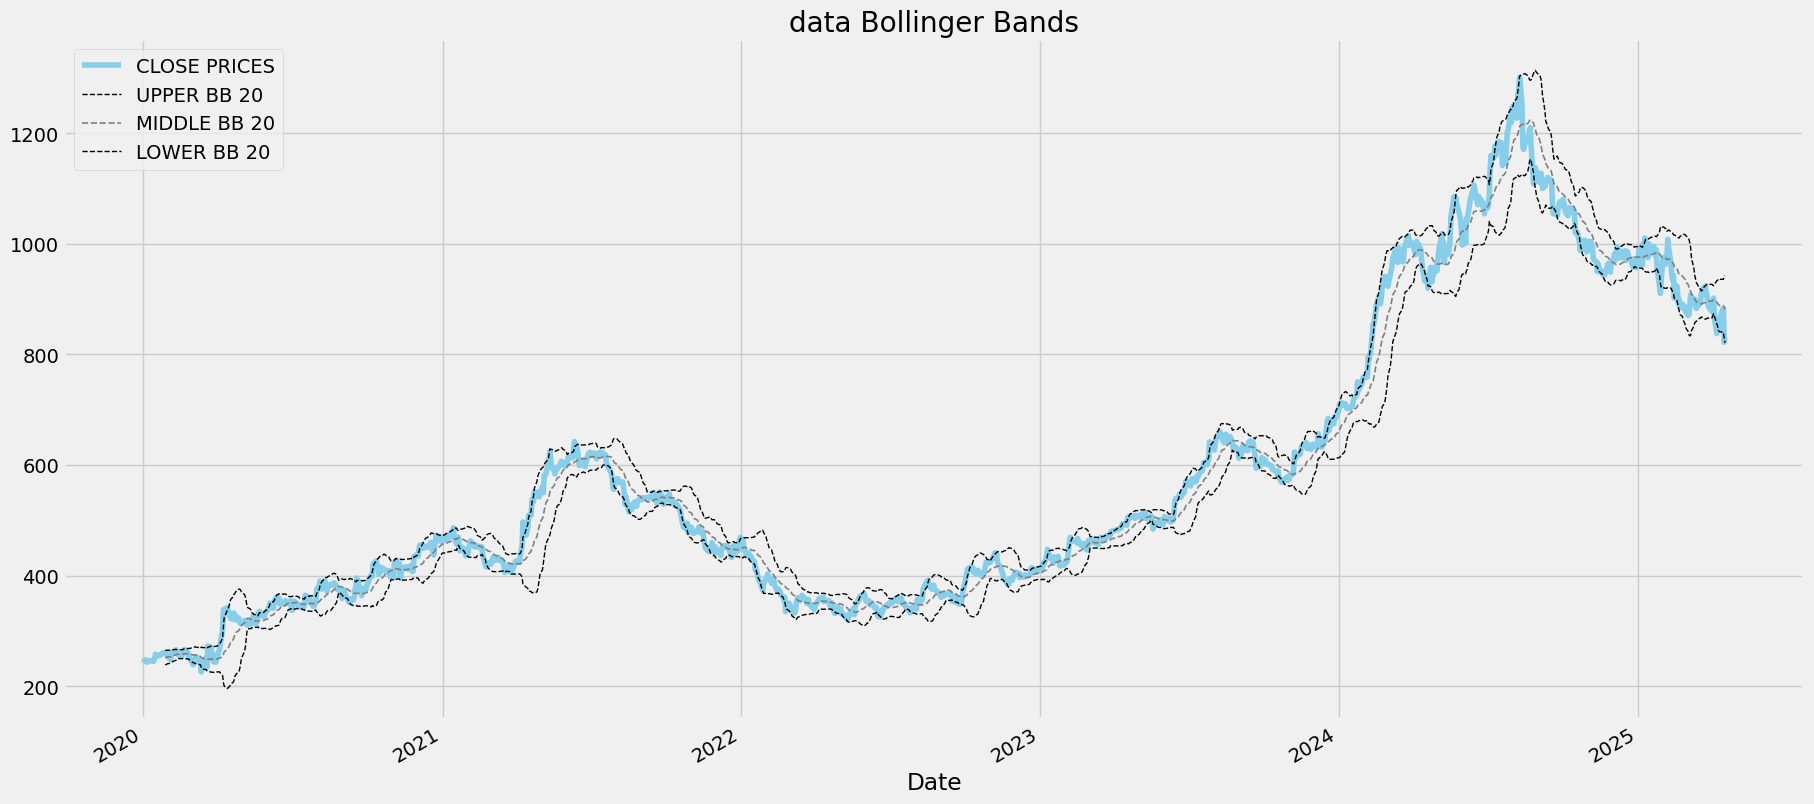

C:\Users\harip\AppData\Local\Temp\ipykernel_20616\2873836500.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data[i - 1] > lower_bb[i - 1] and data[i] < lower_bb[i]:
C:\Users\harip\AppData\Local\Temp\ipykernel_20616\2873836500.py:85: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif data[i - 1] < upper_bb[i - 1] and data[i] > upper_bb[i]:
C:\Users\harip\AppData\Local\Temp\ipykernel_20616\2873836500.py:77: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by posi

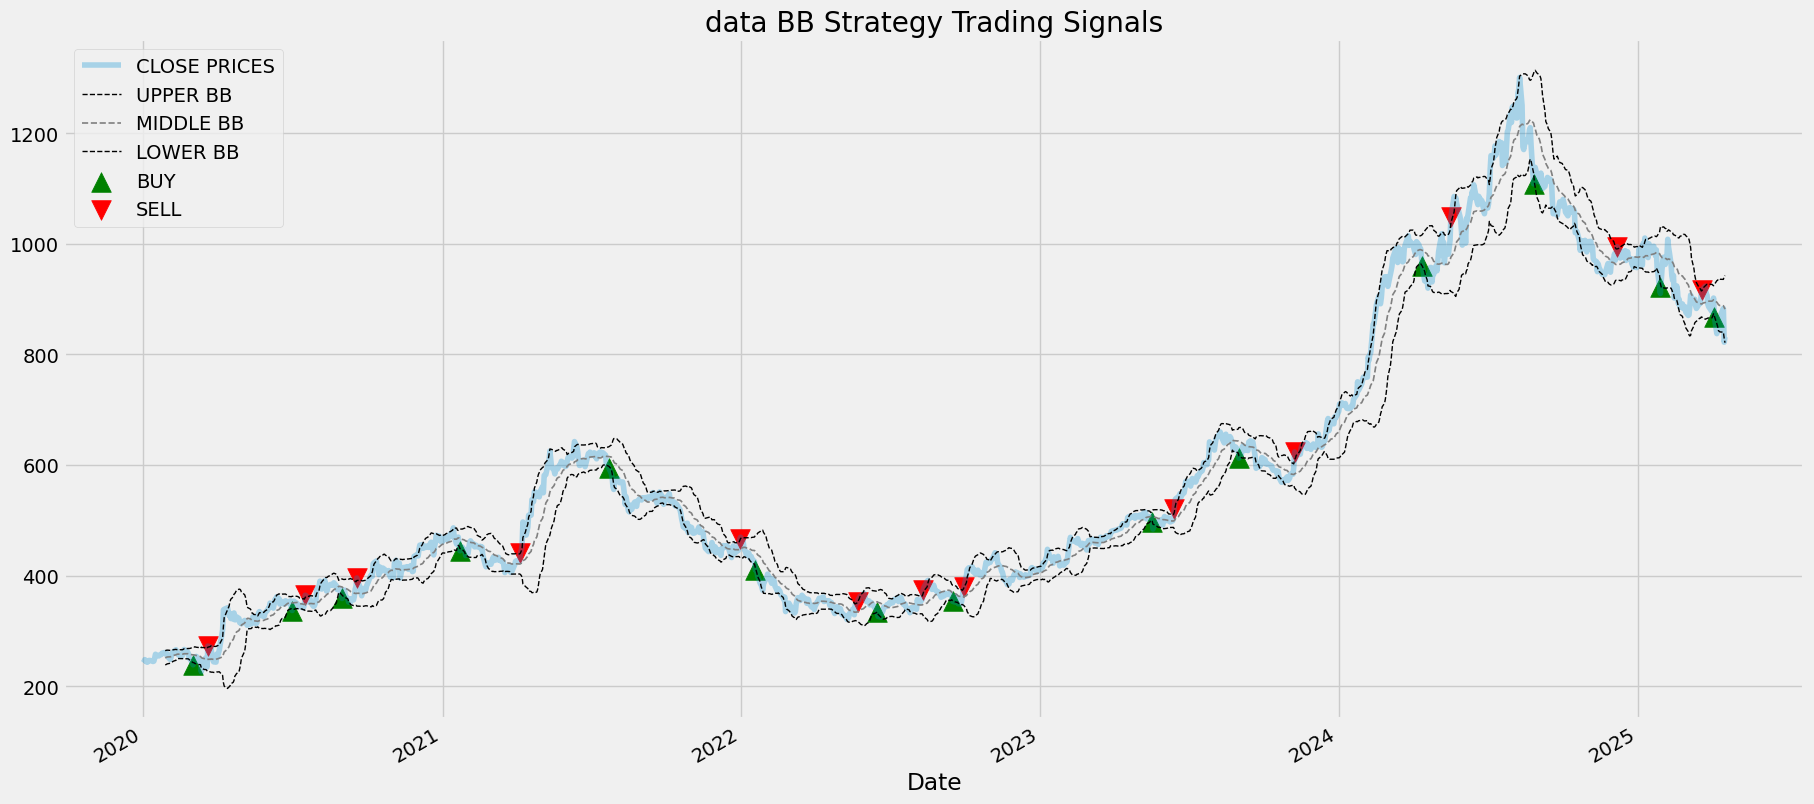

In [ ]:
# Define the ticker symbols for the assets we're interested in
tickers = ['ZYDUSLIFE.NS']  # Example ticker

# # Define the start and end dates for historical data
start_date = '2020-01-01'
end_date = '2025-04-30'

# # Download historical data using yfinance
data = yf.download(tickers, start=start_date, end=end_date)

data = data['Close']['ZYDUSLIFE.NS'].reset_index(name='Close')
data.index = data['Date']
data = data.drop(columns=['Date'])

# Ensure there are no missing values
data = data.dropna()

# Display the first few rows of the data
print(data.head())


# Plot the closing prices
plt.plot(data.index, data['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.title('data Stock Prices 2020-2025')
plt.show()

# Calculate the Simple Moving Average (SMA)
def sma(data, window):
    return data.rolling(window=window).mean()

data['sma_20'] = sma(data['Close'], 20)
print(data.tail(3))

# Plot the SMA along with closing prices
data['Close'].plot(label='CLOSE', alpha=0.6)
data['sma_20'].plot(label='SMA 20', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.legend(loc='upper left')
plt.show()

# Calculate Bollinger Bands
def bb(data, sma, window):
    std = data.rolling(window=window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb

data['upper_bb'], data['lower_bb'] = bb(data['Close'], data['sma_20'], 20)
print(data.tail())

# Plot Bollinger Bands
data['Close'].plot(label='CLOSE PRICES', color='skyblue')
data['upper_bb'].plot(label='UPPER BB 20', linestyle='--', linewidth=1, color='black')
data['sma_20'].plot(label='MIDDLE BB 20', linestyle='--', linewidth=1.2, color='grey')
data['lower_bb'].plot(label='LOWER BB 20', linestyle='--', linewidth=1, color='black')
plt.legend(loc='upper left')
plt.title('data Bollinger Bands')
plt.show()

# Implement Bollinger Bands strategy
def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0

    for i in range(len(data)):
        if data[i - 1] > lower_bb[i - 1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[i - 1] < upper_bb[i - 1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)

    return buy_price, sell_price, bb_signal

buy_price, sell_price, bb_signal = implement_bb_strategy(data['Close'], data['lower_bb'], data['upper_bb'])

# Plot the strategy signals
data['Close'].plot(label='CLOSE PRICES', alpha=0.3)
data['upper_bb'].plot(label='UPPER BB', linestyle='--', linewidth=1, color='black')
data['sma_20'].plot(label='MIDDLE BB', linestyle='--', linewidth=1.2, color='grey')
data['lower_bb'].plot(label='LOWER BB', linestyle='--', linewidth=1, color='black')
plt.scatter(data.index, buy_price, marker='^', color='green', label='BUY', s=200)
plt.scatter(data.index, sell_price, marker='v', color='red', label='SELL', s=200)
plt.title('data BB Strategy Trading Signals')
plt.legend(loc='upper left')
plt.show()

[*********************100%***********************]  3 of 3 completed
C:\Users\harip\AppData\Local\Temp\ipykernel_20616\2087981816.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data[i] < lower_bb[i]:  # Buy signal
C:\Users\harip\AppData\Local\Temp\ipykernel_20616\2087981816.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif data[i] > upper_bb[i]:  # Sell signal
C:\Users\harip\AppData\Local\Temp\ipykernel_20616\2087981816.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavi

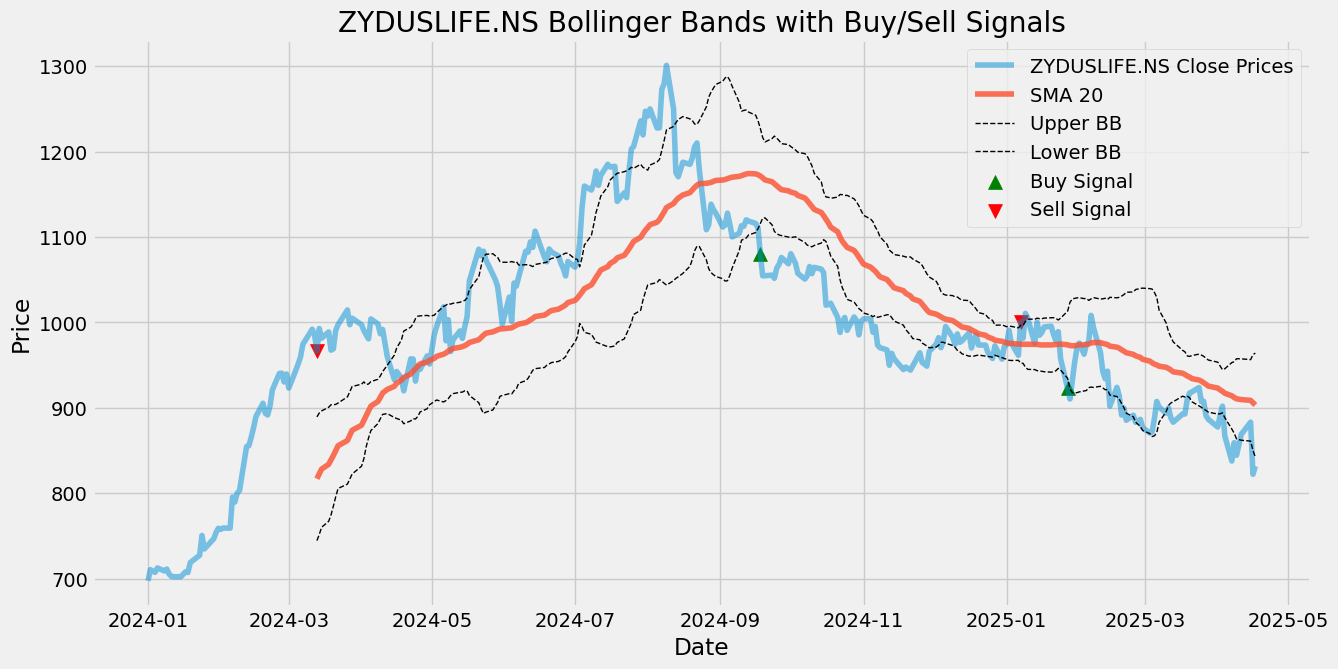

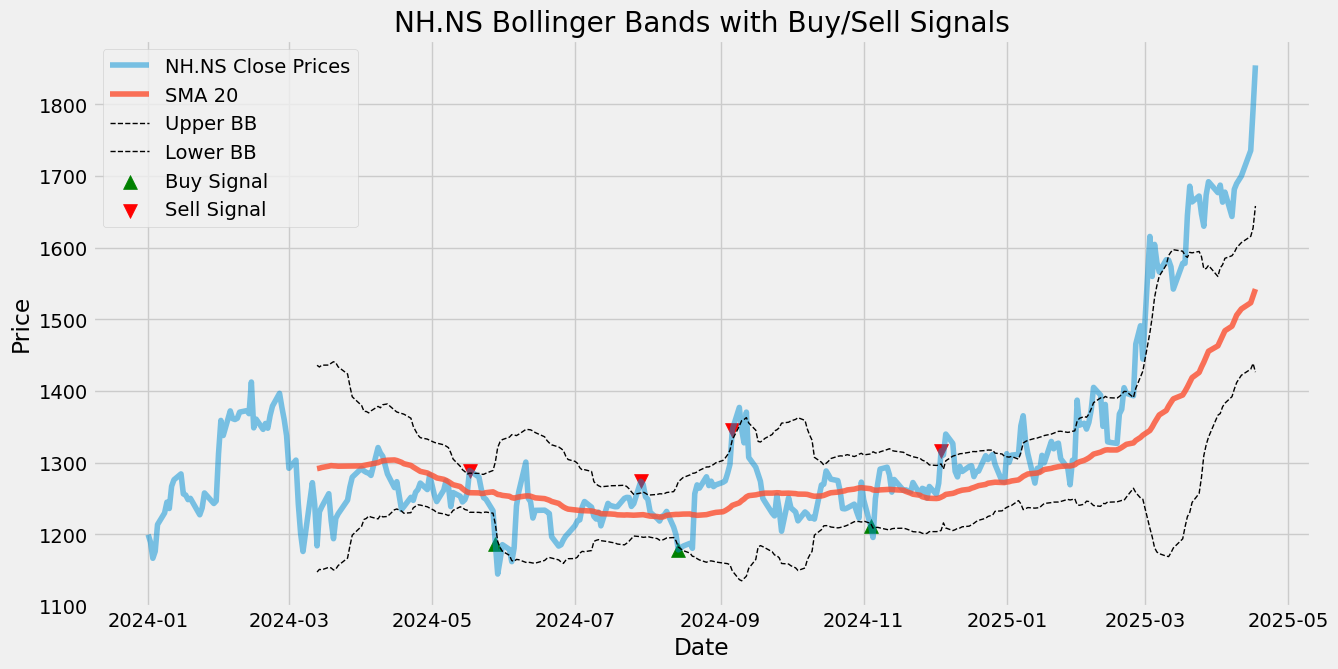

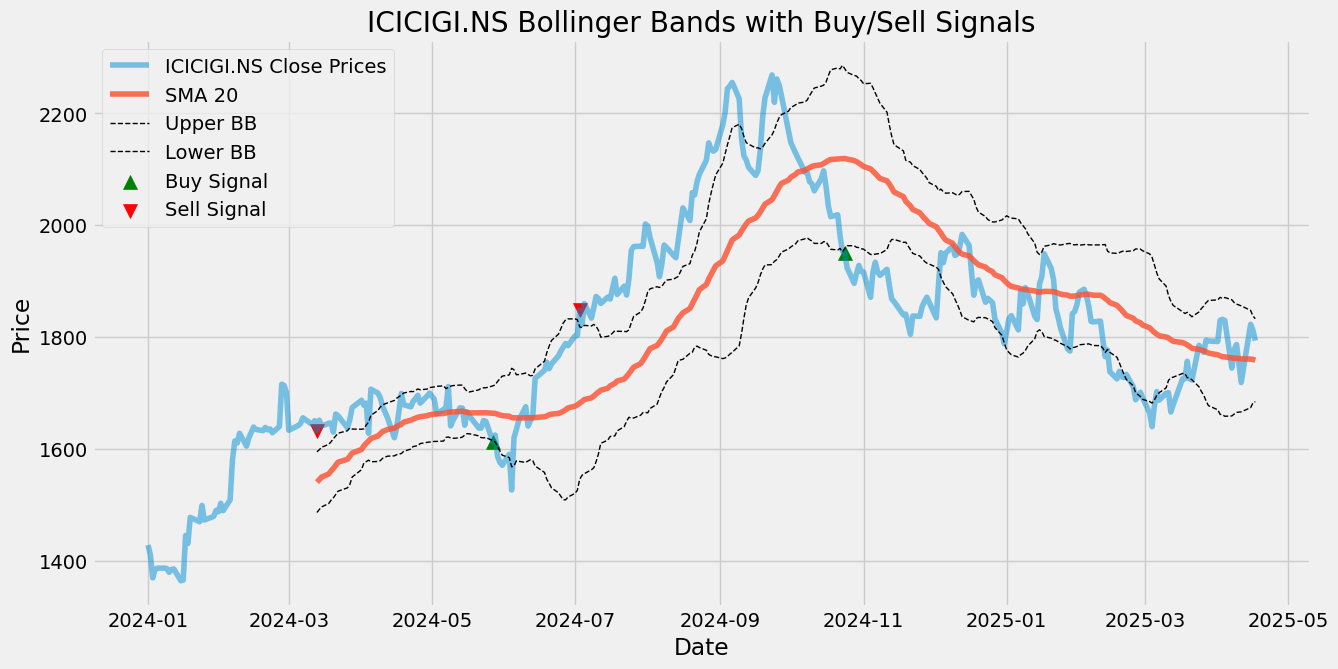

In [85]:
# Import required libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to download and preprocess data for multiple tickers
def download_and_preprocess_data(tickers, start_date, end_date):
    print(f"Downloading data for tickers: {tickers}")
    data = yf.download(tickers, start=start_date, end=end_date,group_by="ticker")
    data = data.dropna()  # Remove missing values
    return data

# Function to calculate Simple Moving Average (SMA)
def calculate_sma(data, window):
    return data.rolling(window=window).mean()

# Function to calculate Bollinger Bands
def calculate_bollinger_bands(data, sma, window):
    std = data.rolling(window=window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb

# Function to implement Bollinger Bands strategy
def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0

    for i in range(len(data)):
        if data[i] < lower_bb[i]:  # Buy signal
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[i] > upper_bb[i]:  # Sell signal
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)

    return buy_price, sell_price, bb_signal

# Function to plot Bollinger Bands with buy/sell signals for multiple tickers
def plot_bollinger_bands_with_signals(data, tickers):
    for ticker in tickers:
        ticker_data = data[ticker]['Close']
        sma_20 = calculate_sma(ticker_data, 50)
        upper_bb, lower_bb = calculate_bollinger_bands(ticker_data, sma_20, 20)
        buy_price, sell_price, _ = implement_bb_strategy(ticker_data, lower_bb, upper_bb)

        plt.figure(figsize=(14, 7))
        plt.plot(ticker_data, label=f'{ticker} Close Prices', alpha=0.5)
        plt.plot(sma_20, label='SMA 20', alpha=0.8)
        plt.plot(upper_bb, label='Upper BB', linestyle='--', linewidth=1, color='black')
        plt.plot(lower_bb, label='Lower BB', linestyle='--', linewidth=1, color='black')
        plt.scatter(ticker_data.index, buy_price, marker='^', color='green', label='Buy Signal', s=100)
        plt.scatter(ticker_data.index, sell_price, marker='v', color='red', label='Sell Signal', s=100)
        plt.title(f'{ticker} Bollinger Bands with Buy/Sell Signals')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()

# Main function to execute the workflow
def main():
    tickers = ['ZYDUSLIFE.NS', 'NH.NS', 'ICICIGI.NS']
    start_date = '2024-01-01'
    end_date = '2025-04-30'

    # Download and preprocess data
    data = download_and_preprocess_data(tickers, start_date, end_date)

    # Plot Bollinger Bands with buy/sell signals for each ticker
    plot_bollinger_bands_with_signals(data, tickers)

# Run the main function
if __name__ == "__main__":
    main()

---

In [96]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20,10)

# Define the ticker symbols for the assets we're interested in
tickers = ['ZYDUSLIFE.NS']  # Example ticker

# # Define the start and end dates for historical data
start_date = '2023-06-01'
end_date = '2025-04-30'

# # Download historical data using yfinance
data = yf.download(tickers, start=start_date, end=end_date)

data = data['Close']['ZYDUSLIFE.NS'].reset_index(name='Close')
data.index = data['Date']
data = data.drop(columns=['Date'])

# Ensure there are no missing values
aapl = data.dropna()

# Display the first few rows of the data
print(aapl.head())


[*********************100%***********************]  1 of 1 completed

                 Close
Date                  
2023-06-01  502.503174
2023-06-02  507.005585
2023-06-05  499.273254
2023-06-06  504.509705
2023-06-07  504.167084


C:\Users\harip\AppData\Local\Temp\ipykernel_20616\1510706038.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ret[i] < 0:
C:\Users\harip\AppData\Local\Temp\ipykernel_20616\1510706038.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  up.append(ret[i])
C:\Users\harip\AppData\Local\Temp\ipykernel_20616\1510706038.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  down.append(ret[i])


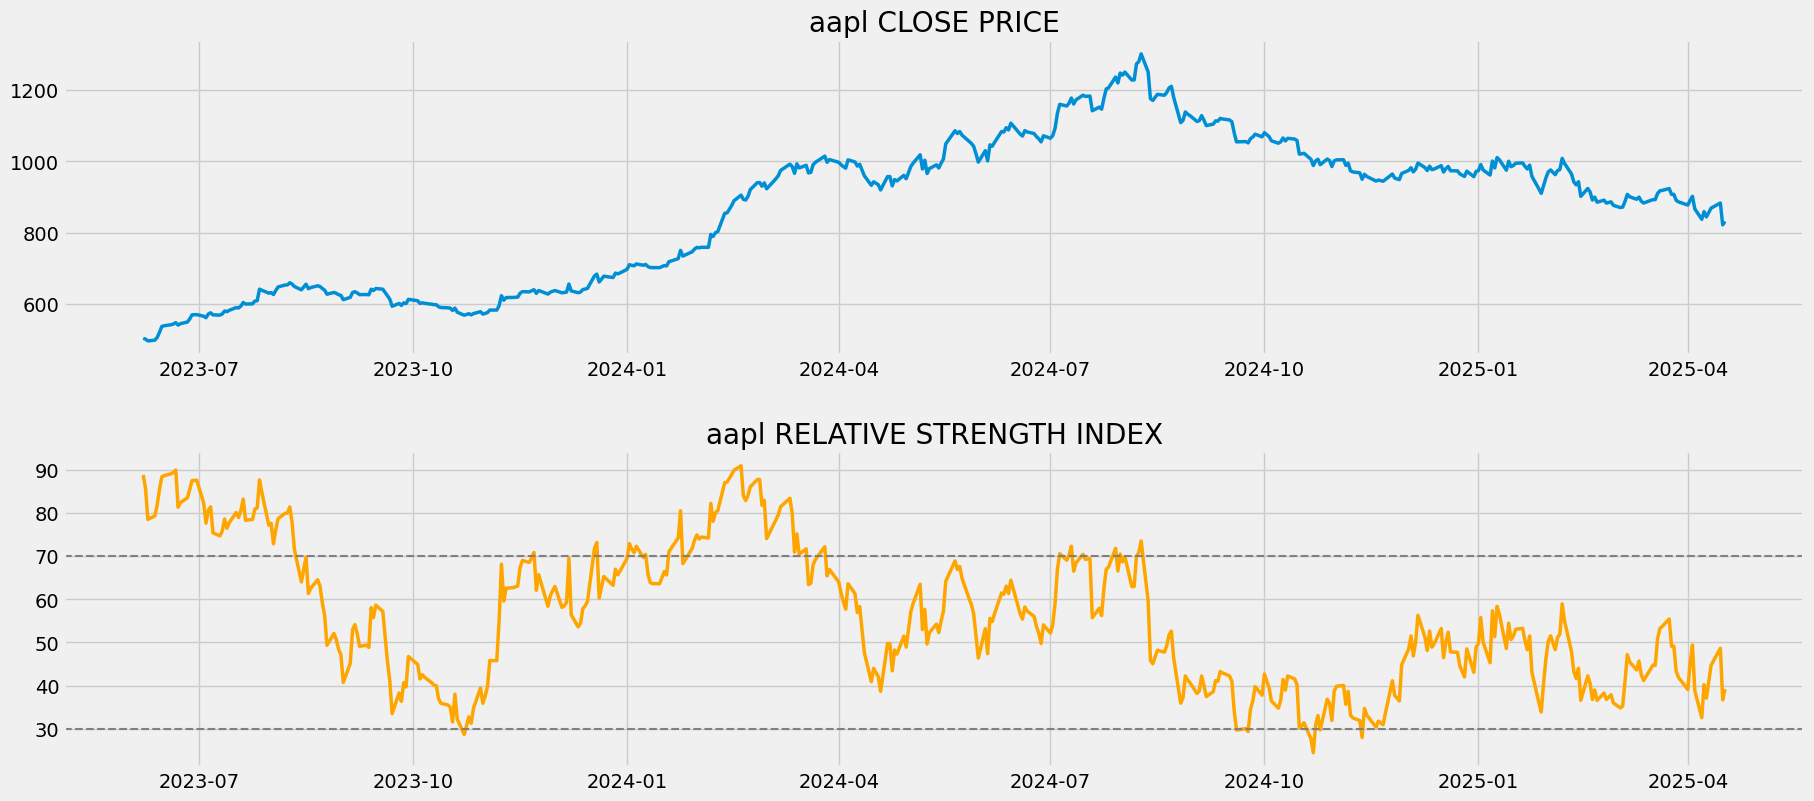

C:\Users\harip\AppData\Local\Temp\ipykernel_20616\1510706038.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if rsi[i-1] > 30 and rsi[i] < 30:
C:\Users\harip\AppData\Local\Temp\ipykernel_20616\1510706038.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif rsi[i-1] < 70 and rsi[i] > 70:
C:\Users\harip\AppData\Local\Temp\ipykernel_20616\1510706038.py:57: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sell_price.append(prices

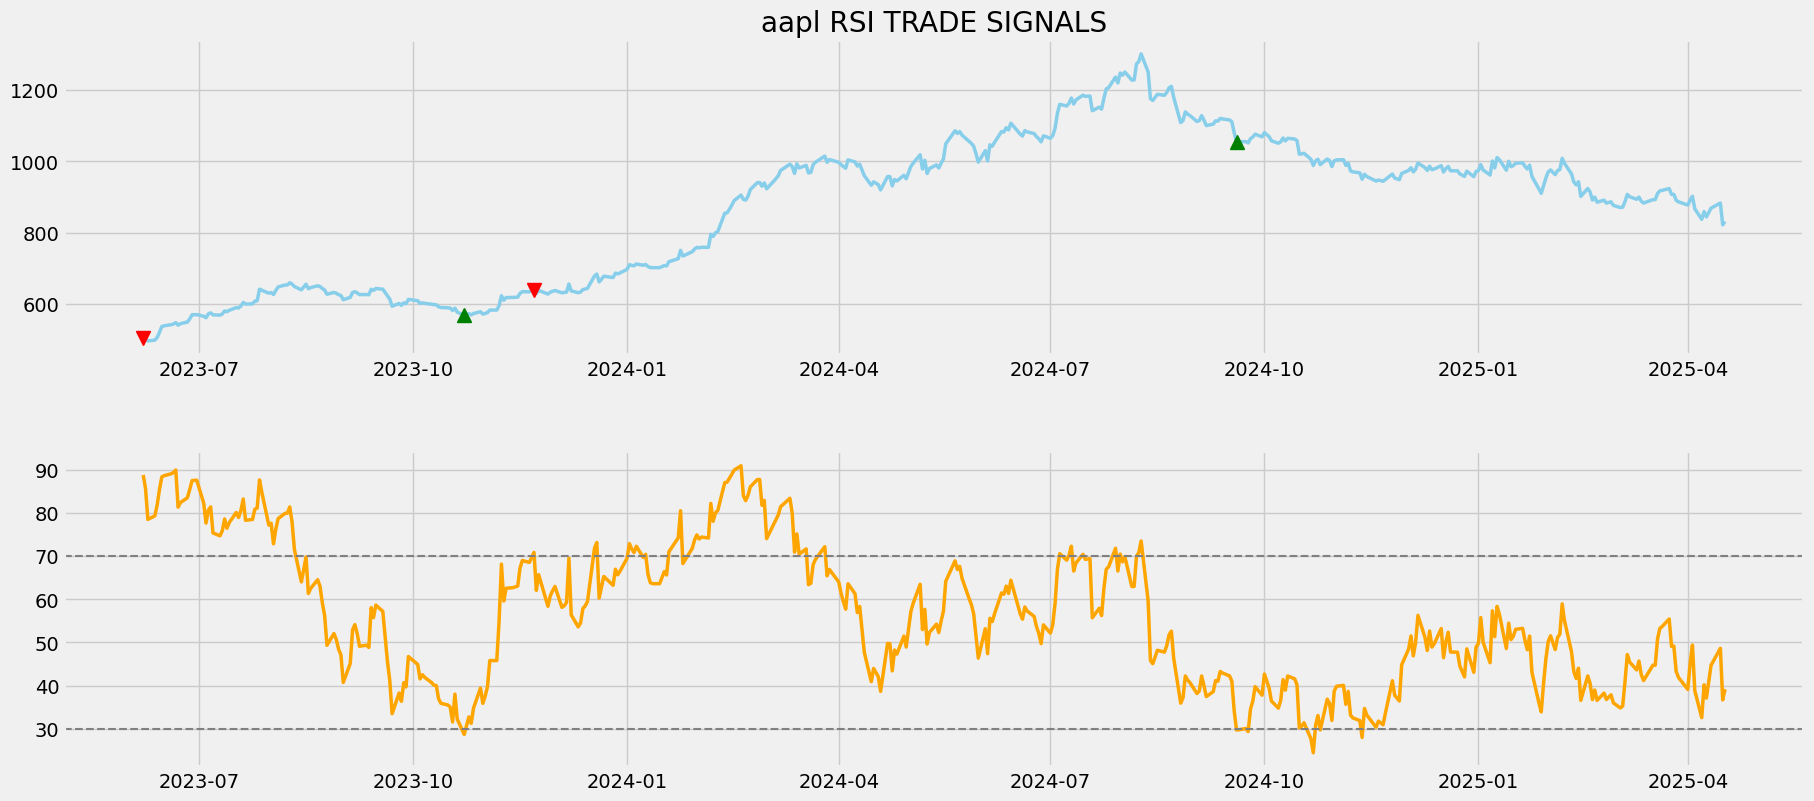

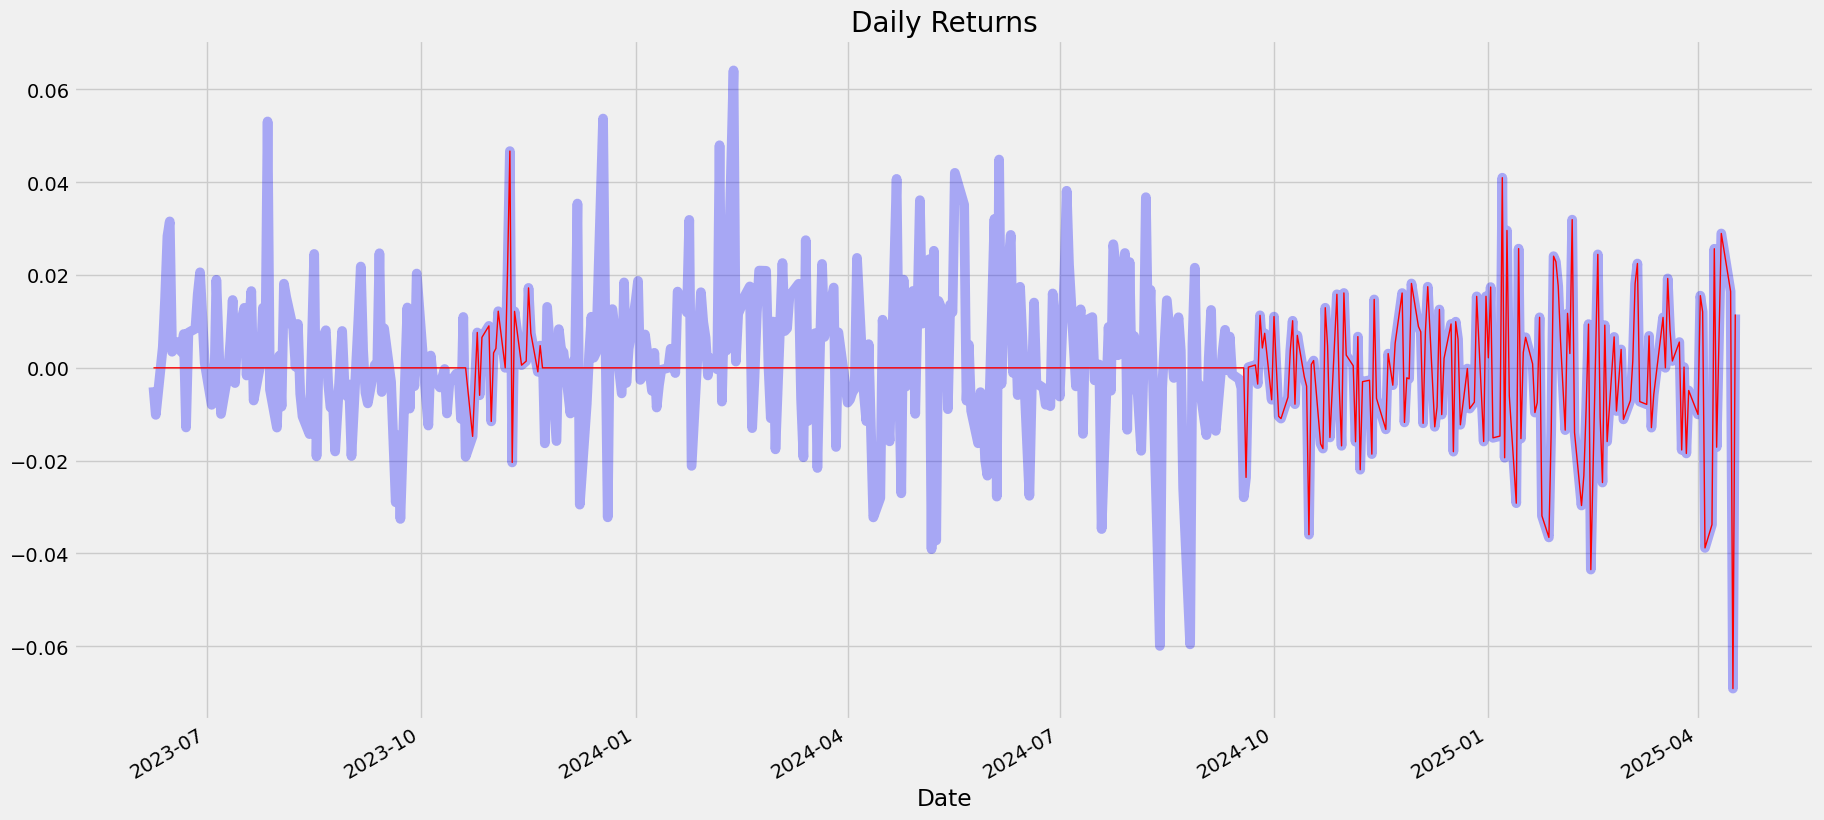

In [97]:
# EXTRACTING STOCK DATA
def get_rsi(close, lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]

aapl['rsi_14'] = get_rsi(aapl['Close'], 14)
aapl = aapl.dropna()
aapl

ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(aapl['Close'], linewidth = 2.5)
ax1.set_title('aapl CLOSE PRICE')
ax2.plot(aapl['rsi_14'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.set_title('aapl RELATIVE STRENGTH INDEX')
plt.show()

def implement_rsi_strategy(prices, rsi):    
    buy_price = []
    sell_price = []
    rsi_signal = []
    signal = 0

    for i in range(len(rsi)):
        if rsi[i-1] > 30 and rsi[i] < 30:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                rsi_signal.append(0)
        elif rsi[i-1] < 70 and rsi[i] > 70:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                rsi_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            rsi_signal.append(0)
            
    return buy_price, sell_price, rsi_signal
            

buy_price, sell_price, rsi_signal = implement_rsi_strategy(aapl['Close'], aapl['rsi_14'])

ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(aapl['Close'], linewidth = 2.5, color = 'skyblue', label = 'aapl')
ax1.plot(aapl.index, buy_price, marker = '^', markersize = 10, color = 'green', label = 'BUY SIGNAL')
ax1.plot(aapl.index, sell_price, marker = 'v', markersize = 10, color = 'r', label = 'SELL SIGNAL')
ax1.set_title('aapl RSI TRADE SIGNALS')
ax2.plot(aapl['rsi_14'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
plt.show()

position = []
for i in range(len(rsi_signal)):
    if rsi_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(aapl['Close'])):
    if rsi_signal[i] == 1:
        position[i] = 1
    elif rsi_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
rsi = aapl['rsi_14']
close_price = aapl['Close']
rsi_signal = pd.DataFrame(rsi_signal).rename(columns = {0:'rsi_signal'}).set_index(aapl.index)
position = pd.DataFrame(position).rename(columns = {0:'rsi_position'}).set_index(aapl.index)

frames = [close_price, rsi, rsi_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)

strategy.head()

rets = aapl.Close.pct_change().dropna()
strat_rets = strategy.rsi_position[1:]*rets

plt.title('Daily Returns')
rets.plot(color = 'blue', alpha = 0.3, linewidth = 7)
strat_rets.plot(color = 'r', linewidth = 1)
plt.show()